In [ ]:
import os 
os.chdir('/content/drive/MyDrive/Ineuron_Practical')

In [ ]:
ls

'5 different CNN architectures of CIFAR-10 .ipynb'
 Ann_Regression_analysis_Grid_search.ipynb
 Assignment1_Fashion_Mnist.ipynb
 Batch_normalization_Keras.ipynb
 Convolutional_Neural_Network_World_1.ipynb
 full_mnist_model.h5
 June_6_batch.ipynb
 log/
 Mnist_dataset_ANN.ipynb
'Mnist_dataset_ANN_With Callbacks.ipynb'
'Mnist_with_5_different_Networks .ipynb'
 model_best_fashion.h5
 model_ckpt.h5
 model.weights.best.hdf5
 my_logs/
 pretrained_mnist_model.h5
'Regression_Model_Using Keras.ipynb'
 Trained_model/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [ ]:
(xtrain,ytrain),(xtest,ytest)= tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


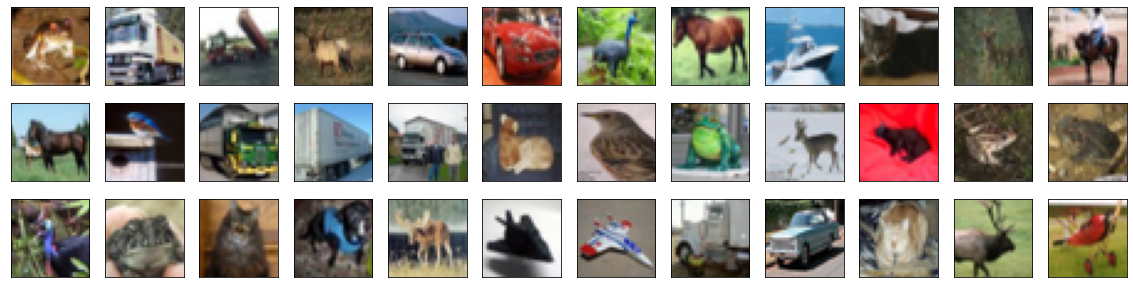

In [ ]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
  ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(xtrain[i]))

In [ ]:
xtrain_scaled = xtrain/255.
xtest_scaled  = xtest/255.

In [ ]:
model_name = []
model_acc = []

In [ ]:
## Converting the shape of xtrain from 3d to 4d and also target labels into one hot vector
num_class = len(np.unique(ytrain))
y_train = tf.keras.utils.to_categorical(ytrain,num_class)
y_test = tf.keras.utils.to_categorical(ytest,num_class)

print("xtrain.shape:", xtrain.shape)





xtrain.shape: (50000, 32, 32, 3)


In [ ]:
# importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

## MODEL 1 - with only 7 Layers before flattening

In [ ]:
model1 = Sequential()
# Convolution Layer 1
model1.add(Conv2D(16,kernel_size=2,strides=2,padding='same',activation='relu',input_shape = xtrain.shape[1:]))
model1.add(MaxPooling2D(pool_size=2))
# Convolution Layer 2
model1.add(Conv2D(32,kernel_size=2,padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
# Convolution Layer 3
model1.add(Conv2D(64,kernel_size=2,padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.3))

# Convolution Layer 4
model1.add(Conv2D(128,kernel_size=2,padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=2))

# Convolution Layer 5
model1.add(Conv2D(256,kernel_size=2,padding='same',activation='relu'))


# Convolution Layer 6
model1.add(Conv2D(512,kernel_size=2,padding='same',activation='relu'))

model1.add(Dropout(0.3))

# Convolution Layer 7
model1.add(Conv2D(64,kernel_size=2,padding='same',activation='relu'))



# Flattening the layer
model1.add(Flatten())

# Adding the Dense layers
model1.add(Dense(512,activation='relu'))
model1.add(Dense(128,activation='relu'))

# adding the output layer
model1.add(Dense(10,activation='softmax'))

model1.summary()

model1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10,verbose=1,restore_best_weights=True)
model_checkpt  = ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only=True)

hist1 = model1.fit(xtrain_scaled,y_train,epochs=50,batch_size=64,validation_split=0.25,verbose=1,callbacks=[early_stopping,model_checkpt])






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 16, 16, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 32)          2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 64)         

In [ ]:
score = model1.evaluate(xtest_scaled,y_test)
model1_accuracy = score[1]*100
print("Accuracy:", model1_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 1.0913 - accuracy: 0.6179
Accuracy: 61.7900013923645


In [ ]:
model_name.append('Convolation Layer with 7 layers with Relu only')
model_acc.append(model1_accuracy)

In [ ]:
print(model_name)
print(model_acc)

['Convolation Layer with 7 layers with Relu only']
[61.7900013923645]


## MODEL 2 - with only 7 Layers before flattening with Different activation functions


In [ ]:
model2 = Sequential()
# Convolution Layer 1
model2.add(Conv2D(16,kernel_size=3,strides=1,padding='same',activation='relu',input_shape = xtrain.shape[1:]))
model2.add(MaxPooling2D(pool_size=2))
# Convolution Layer 2
model2.add(Conv2D(32,kernel_size=3,padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
# Convolution Layer 3
model2.add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.3))

# Convolution Layer 4
model2.add(Conv2D(128,kernel_size=3,padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=2))

# Convolution Layer 5
model2.add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))


# Convolution Layer 6
model2.add(Conv2D(32,kernel_size=3,padding='same',activation='relu'))

model2.add(Dropout(0.3))

# Convolution Layer 7
model2.add(Conv2D(16,kernel_size=3,padding='same',activation='relu'))



# Flattening the layer
model2.add(Flatten())

# Adding the Dense layers
model2.add(Dense(512,activation='relu'))
model2.add(Dense(128,activation='relu'))

# adding the output layer
model2.add(Dense(10,activation='softmax'))

model2.summary()

model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10,verbose=1,restore_best_weights=True)
model_checkpt  = ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only=True)

hist2 = model2.fit(xtrain_scaled,y_train,epochs=50,batch_size=64,validation_split=0.25,verbose=1,callbacks=[early_stopping,model_checkpt])






Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 64)         

In [ ]:
score = model2.evaluate(xtest_scaled,y_test)
model2_accuracy = score[1]*100
print("Accuracy:", model2_accuracy)


model_name.append('Convolation Layer with 7 layers with Kernal filter 3*3')
model_acc.append(model2_accuracy)

print(model_name)
print(model_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8396 - accuracy: 0.7143
Accuracy: 71.42999768257141
['Convolation Layer with 7 layers with Relu only', 'Convolation Layer with 7 layers with Kernal filter 3*3']
[61.7900013923645, 71.42999768257141]


MODEL 3 with Kernal filter 5 * 5 and strides 2 with no maxpooling

In [ ]:
model3 = Sequential()
# Convolution Layer 1
model3.add(Conv2D(16,kernel_size=5,strides=1,padding='same',activation='relu',input_shape = xtrain.shape[1:]))

# Convolution Layer 2
model3.add(Conv2D(32,kernel_size=5,padding='same',activation='selu',kernel_initializer='lecun_uniform'))
#model3.add(MaxPooling2D(pool_size=2))
# Convolution Layer 3
model3.add(Conv2D(64,kernel_size=5,padding='same',activation='selu',kernel_initializer='lecun_uniform'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.7))

# Convolution Layer 4
model3.add(Conv2D(128,kernel_size=3,padding='same',activation='selu',kernel_initializer='lecun_uniform'))
model3.add(MaxPooling2D(pool_size=2))

# Convolution Layer 5
model3.add(Conv2D(64,kernel_size=3,padding='same',activation='selu',kernel_initializer='lecun_uniform'))


# Convolution Layer 6
model3.add(Conv2D(32,kernel_size=3,padding='same',activation='selu',kernel_initializer='lecun_uniform'))

model3.add(Dropout(0.3))

# Convolution Layer 7
model3.add(Conv2D(16,kernel_size=3,padding='same',activation='selu',kernel_initializer='lecun_uniform'))



# Flattening the layer
model3.add(Flatten())

# Adding the Dense layers
model3.add(Dense(512,activation='selu',kernel_initializer='lecun_uniform'))
model3.add(Dense(128,activation='selu',kernel_initializer='lecun_uniform'))

# adding the output layer
model3.add(Dense(10,activation='softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10,verbose=1,restore_best_weights=True)
model_checkpt  = ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only=True)

hist3 = model3.fit(xtrain_scaled,y_train,epochs=50,batch_size=64,validation_split=0.25,verbose=1,callbacks=[early_stopping,model_checkpt])






Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 16)        1216      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        12832     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 128)        

In [ ]:
score = model3.evaluate(xtest_scaled,y_test)
model3_accuracy = score[1]*100
print("Accuracy:", model3_accuracy)


model_name.append('Convolation Layer with 7 layers with Kernal filter 5*5 And Selu Activation')
model_acc.append(model3_accuracy)

print(model_name)
print(model_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.9395 - accuracy: 0.6769
Accuracy: 67.69000291824341
['Convolation Layer with 7 layers with Relu only', 'Convolation Layer with 7 layers with Kernal filter 3*3', 'Convolation Layer with 7 layers with Kernal filter 3*3']
[61.7900013923645, 71.42999768257141, 67.69000291824341]


#Model 4 with kernal 5*5 and selu activation function

In [ ]:
model4 = Sequential()
# Convolution Layer 1
model4.add(Conv2D(16,kernel_size=5,strides=2,padding='same',activation='relu',input_shape = xtrain.shape[1:]))

# Convolution Layer 2
model4.add(Conv2D(32,kernel_size=5,padding='same',activation='selu',kernel_initializer='lecun_uniform'))
model4.add(MaxPooling2D(pool_size=2))
# Convolution Layer 3
model4.add(Conv2D(64,kernel_size=5,padding='same',activation='selu',kernel_initializer='lecun_uniform'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.7))

# Convolution Layer 4
model4.add(Conv2D(128,kernel_size=3,padding='same',activation='selu',kernel_initializer='lecun_uniform'))
model4.add(MaxPooling2D(pool_size=2))

# Convolution Layer 5
model4.add(Conv2D(64,kernel_size=3,padding='same',activation='selu',kernel_initializer='lecun_uniform'))


# Convolution Layer 6
model4.add(Conv2D(32,kernel_size=3,padding='same',activation='selu',kernel_initializer='lecun_uniform'))

model4.add(Dropout(0.3))

# Convolution Layer 7
model4.add(Conv2D(16,kernel_size=3,padding='same',activation='selu',kernel_initializer='lecun_uniform'))



# Flattening the layer
model4.add(Flatten())

# Adding the Dense layers
model4.add(Dense(512,activation='selu',kernel_initializer='lecun_uniform'))
model4.add(Dense(128,activation='selu',kernel_initializer='lecun_uniform'))

# adding the output layer
model4.add(Dense(10,activation='softmax'))

model4.summary()

model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10,verbose=1,restore_best_weights=True)
model_checkpt  = ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only=True)

hist4 = model4.fit(xtrain_scaled,y_train,epochs=50,batch_size=64,validation_split=0.25,verbose=1,callbacks=[early_stopping,model_checkpt])






Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 16, 16, 16)        1216      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 128)        

In [ ]:
  score = model4.evaluate(xtest_scaled,y_test)
model4_accuracy = score[1]*100
print("Accuracy:", model4_accuracy)


model_name.append('Convolation Layer with kernal 5*5 and selu activation function')
model_acc.append(model4_accuracy)

print(model_name)
print(model_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.8749 - accuracy: 0.7157
Accuracy: 71.56999707221985
['Convolation Layer with 7 layers with Relu only', 'Convolation Layer with 7 layers with Kernal filter 3*3', 'Convolation Layer with 7 layers with Kernal filter 5*5 And Selu Activation', 'Convolation Layer with kernal 5*5 and selu activation function']
[61.7900013923645, 71.42999768257141, 67.69000291824341, 71.56999707221985]


In [ ]:
df_model_comparison = pd.DataFrame({'Model Name':model_name,'Model_Accuracy':model_acc})

In [ ]:
df_model_comparison

,Model Name,Model_Accuracy
0,Convolation Layer with 7 layers with Relu only,61.790001
1,Convolation Layer with 7 layers with Kernal fi...,71.429998
2,Convolation Layer with 7 layers with Kernal fi...,67.690003
3,Convolation Layer with kernal 5*5 and selu act...,71.569997


In [ ]:
# get predictions on the test set
y_hat = model4.predict(xtest_scaled)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

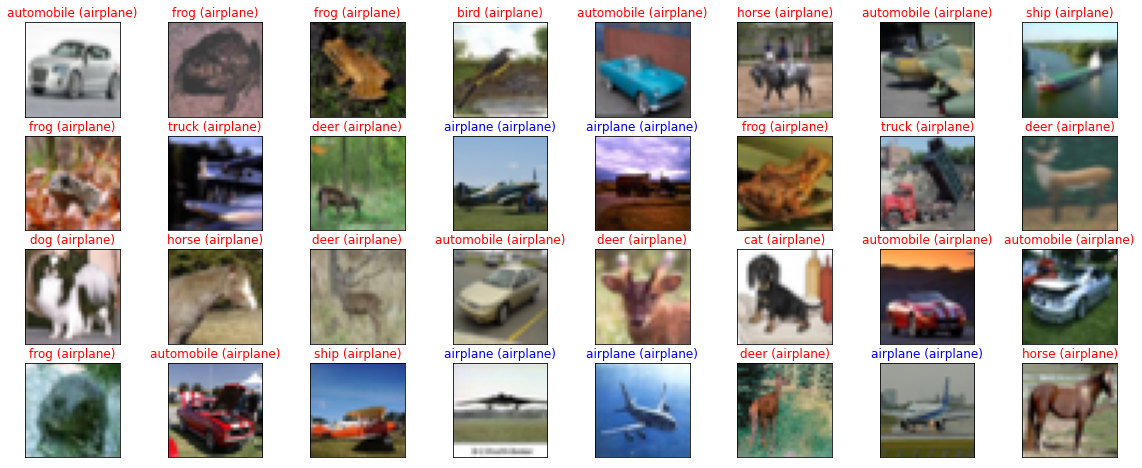

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(xtest_scaled.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(xtest[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(ytest[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))